# CS178 Homework 2


---
## Instructions


This homework (and subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.

Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or LaTeX to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: k-Nearest Neighbors (25 points)
    - Problem 1.1: Splitting data into training & test sets (10 points)
    - Problem 1.2: Plot predictions for different values of k (10 points)
    - Problem 1.3: Display performance as a function of k & select best (5 points)
    
- Problem 2: Linear Regression (25 points)
    - Problem 2.1: Train the model and plot the data along with its predictions (15 points)
    - Problem 2.2: Compute the MSE loss for the training and evaluation data (10 points)
    
- Problem 3: Feature transformations (25 points)
    - Problem 3.1: Train & display polynomial regression models using feature transforms (10 points)
    - Problem 3.2: Plot the training & evaluation error as a function of degree (10 points)
    - Problem 3.3: Select the best degree for these data (5 points)

- Problem 4: Cross-Validation (20 points)
    - Problem 4.1: Plot the five-fold cross validation error (10 points)
    - Problem 4.2: Select the best degree using cross-validation (5 points)
    - Problem 4.3: Compare cross-validation model selection to hold-out data (5 points)
    
- Statement of Collaboration (5 points)

<center> <img src="http://sli.ics.uci.edu/extras/sep.png" alt="--------------------------------------------" width="200px" height="20px" style="width:200px;height:20px;"/> </center>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error as mse

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LinearRegression    # Basic Linear Regression
from sklearn.linear_model import Ridge               # Linear Regression with L2 regularization

from sklearn.model_selection import KFold            # Cross-validation tools

from sklearn.preprocessing import PolynomialFeatures # Feature transformations
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline                # Useful for sequences of transforms

import requests                                      # reading data
from io import StringIO

seed = 1234

# Training / Test Splits

As we've seen in lecture, it is difficult to tell how accurate our model is from only the data on which it has been trained.  For this reason, we usually reserve some data for evaluation, often called "validation" or "test" data.  We'll start by loading a one-dimensional regression data set to use in the rest of the homework.  We will divide this data set into 75% training data, and 25% evaluation data:

In [68]:
url = 'https://www.ics.uci.edu/~ihler/classes/cs178/data/curve80.txt'

with requests.get(url) as link: curve = np.genfromtxt(StringIO(link.text),delimiter=None)

X = curve[:,0:-1]      # extract features
Y = curve[:,-1]        # extract target values

# split into training and evaluation data
Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.25, random_state=seed)

# P1: K-Nearest Neighbor Regression

### P1.1: Visualizing the Data Splits

Plot the data for this regression problem, with the (scalar) feature $x$ along the horizontal axis, and the real-valued target $y$ as the vertical axis.  Plot all the data, displaying the training data $X_t$ in one color, and the evaluation data $X_e$ in a different color.

### MY NOTES START HERE ###

Based on HW 1, problem 1.5 and lecture 3, I'm going to assume I need to just create 1 scatterplot that has a
range of values corresponding to the targets and the features that are split into training/eval data.

fig, axes = plt.subplots(1, 1)

colors = ['b', 'g'] 
Blue = X_t, Y_t and then Green = X_e, Y_e

for i in range(2):
    for j in range(2):
        for c in np.unique(Y):
            axes.plot(X[Y==c,i], X[Y==c,j], 'o', color=colors[int(c)])

fig.tight_layout()

Looked at W3 schools for a function to just create one scatter plot, because I don't think it needs to be as complicated as above.

I was right, just need to use plt.scatter and it works as long as two arrays passed through are the same length. So I will check that now.

print(len(Ye), len(Xe), len(Yt), len(Xt)) # Same length for Xe, Ye and Xt, Yt yayyy (20 20 60 60)

### MY NOTES END HERE ###

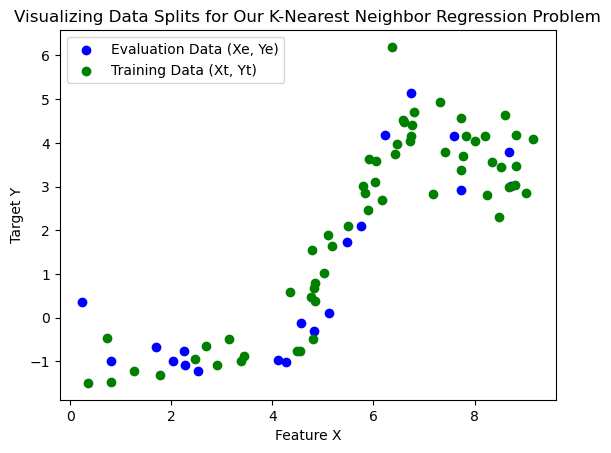

In [72]:
### MY FINAL ANSWER FOR 1.1 IS BELOW ###

plt.scatter(Xe, Ye, color='blue', label="Evaluation Data (Xe, Ye)")
plt.scatter(Xt, Yt, color='green', label="Training Data (Xt, Yt)")
plt.title("Visualizing Data Splits for Our K-Nearest Neighbor Regression Problem")
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.legend()

plt.show()

### P1.2 Visualizing KNN Regression Predictions

Now use `sklearn`'s `KNeighborsRegressor` class to build a nearest neighbor regression model on your training data.  Build three models, using $k=1$, $k=5$, $k=10, and $k=20$, and for each one display the training data, test data, and prediction function.  (Note: you can evaluate the prediction function of your learner by predicting at a dense collection of locations `x_spaced` along the x-axis, and then predicting at these points and connecting them using `plot`.)

### MY NOTES START HERE ###
At first I kept running into an error with axes not being subscriptable, and I realized it was because while one could technically think of the plot as 2D, it really isn't. I was using axes[i][j] instead of axes[i]. 

I also added an inner for loop to increment the index for the axes.. but then I realized that doesn't make sense because then for each k, the same data will be plotted on four separate plots... and so I just created a variable and incremented that manually. 

I wanted to add a title but not to each plot, so I looked at the matplotlib documentation to figure out how to do that. I also consulted the matplotlib documentation to look at how I could create a legend and then, well, fig.legend displays the labels/colors for each plot so I swapped it to plt.legend to just get one since all of my colors are the same for each piece of data. I tried to move around the legend more so that it could be next to the title but it just kept messing up the subplots so I just left it alone. 

I looked at problem 2 and 3 from HW1 as well as problem 1.1 in this HW2 to make sure I was on the right track coding-wise, and then lecture 3 to see how the graphs should look. I think my graphs are good to go because as k increases, the prediction line looks "smoother"
### MY NOTES END HERE ###

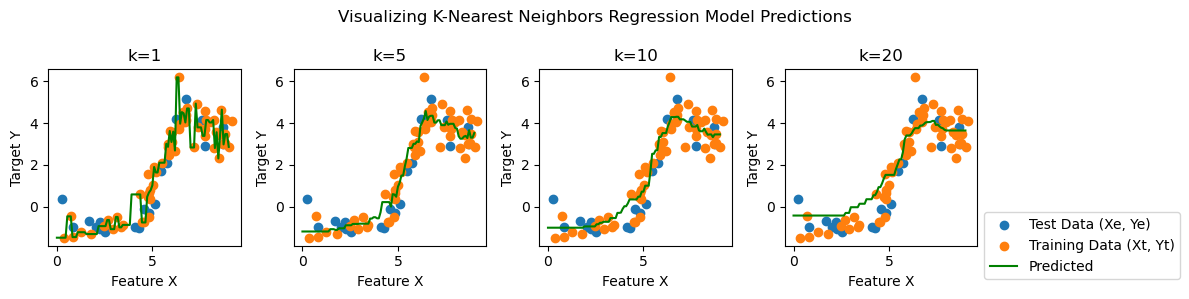

In [75]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

x_spaced = np.linspace(0,9,100).reshape(-1,1)  # get a collection of x-locations at which to plot f(x)

### YOUR CODE STARTS HERE ###
i = 0


for k in [1,5,10,20]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(Xt, Yt)

    knn_y_pred = knn.predict(x_spaced)
    
    axes[i].scatter(Xe, Ye, label="Test Data (Xe, Ye)")
    axes[i].scatter(Xt, Yt, label="Training Data (Xt, Yt)")
    axes[i].plot(x_spaced, knn_y_pred, label="Predicted", color="green")
    axes[i].set_xlabel("Feature X")
    axes[i].set_ylabel("Target Y")
    axes[i].set_title(f"k={k}")

    i += 1

fig.suptitle("Visualizing K-Nearest Neighbors Regression Model Predictions")
plt.legend(bbox_to_anchor=(1, 0), loc="center left")
###  YOUR CODE ENDS HERE  ###

fig.tight_layout()

### P1.3: KNN Model Selection

Train a model for each $k$ in $1 \leq k \leq 50$, and compute their training and validation MSE.  Plot these values as a function of $k$.  What is the best value of $k$ for your model?

### MY NOTES START HERE ###
Lecture 3 slide 59-61 has MSE content

There is a provided MSE function, check top of notebook

Green is validation/evaluation/test data while blue is training data. K-values are on the x-axis.

Looks like as k increases, both the MSE of evaluation and training data have similar trends. However, the evaluation/validation/test data increases by far more than the training data as k increases. This means that the error on the validation/test data is higher than the error on the training data. Follows the similar trend in Lecture 3, Slide 37. Using that same slide, I can see that the best value of K should be somewhere where the training data begins to plateau and the lowest point of the validation/test data? 

Update: Kinda but also... more so that the higher the K, the higher the test and training error, but the smaller the k, the better the fit of our model. Except, if it's too small, the training data is fitted better, but the test performance degrades (according to the reading). K=1 always gives the best training performance but that's why we can't just select k using training data alone. 

Therefore, the best value of K should beeeeeee somewhere between large and small values of K since that would mean the MSE is ideally the smallest it can possibly be within the constraints of viewing both evaluation and training data.  It avoids overfitting and underfitting. I think it should be somewhere in k=[3,10]. To confirm, I will print out the value of k and the corresponding evaluation MSE and training MSE.  I will also print out the minimum evaluation MSE to confirm and find the corresponding k-value for that (it is k=3).

### MY NOTES END HERE ###

## ANSWER: The best value of k for my model is 3.

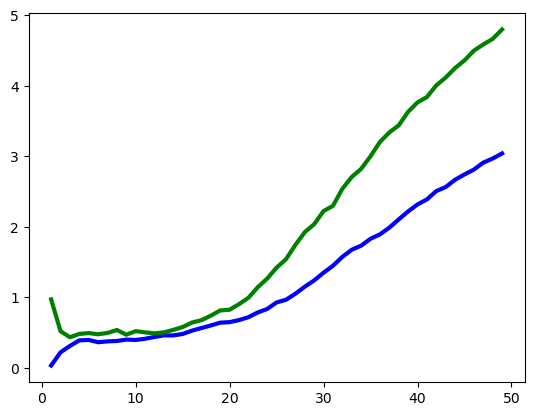

In [79]:
k_values = list(range(1,50))
mse_train = []
mse_eval = []

for i,k in enumerate(k_values):

    ### YOUR CODE STARTS HERE ###
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(Xt, Yt)
    knn_y_pred_train = knn.predict(Xt)
    mse_train.append(mse(Yt, knn_y_pred_train))
    knn_y_pred_validation = knn.predict(Xe)
    mse_eval.append(mse(Ye, knn_y_pred_validation))
    # print(f"K = {k}, mse_eval: {mse_eval[i]}, mse_train: {mse_train[i]}")
# print(min(mse_eval))
    ###  YOUR CODE ENDS HERE  ###
plt.plot(k_values,mse_train,'b-', k_values,mse_eval,'g-', lw=3);

# P2: Linear Regression

### P2.1: Train linear regression model
Now, let's train a simple linear regression model on the training data.  After training the model, plot the training data (colored blue), evaluation data (colored red), and our linear fit (a line) together on a single plot.  Also print out the coefficients (slope, `lr.coef_`, and intercept, `lr.intercept_`) of your model after fitting.

Slope: [0.77684721] and intercept: -2.3463013180118275


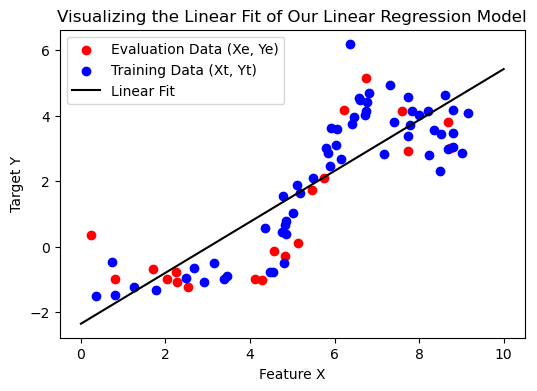

In [82]:
plt.figure(figsize=(6,4))

    ### YOUR CODE STARTS HERE ###
# This is pretty simple since I've worked hard to think through the previous problems, so I don't have any notes here.

lr = LinearRegression()      # create and fit model to training data
lr.fit(Xt, Yt)
# to plot the prediction, we'll evaluate our model at a dense set of locations:
x_spaced = np.linspace(0,10,200).reshape(-1,1)   # data points should be shape (m,1)
yhat_spaced = lr.predict(x_spaced)

# plt.figure(figsize=(6,4)) # looks like this was accidentally here lol 
plt.scatter(Xe, Ye, color='red', label="Evaluation Data (Xe, Ye)")
plt.scatter(Xt, Yt, color='blue', label="Training Data (Xt, Yt)")
plt.plot(x_spaced, yhat_spaced, label="Linear Fit", color="black")
plt.title("Visualizing the Linear Fit of Our Linear Regression Model")
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.legend()  # plot the data and linear fit

print("Slope:", lr.coef_, "and intercept:", lr.intercept_)   # slope & intercept of your fit model

    ###  YOUR CODE ENDS HERE  ###

### P2.2 Evaluate your model's fit

Compute the mean squared error of your trained model on the training data (the data it was fit on) and the held-out evaluation data.

In [84]:
lr_y_pred_train = lr.predict(Xt)
lr_y_pred_validation = lr.predict(Xe)
print(f"MSE of trained model on training data: {mse(Yt, lr_y_pred_train)}")
print(f"MSE of trained model on evaluation data: {mse(Ye, lr_y_pred_validation)}")

MSE of trained model on training data: 1.270893125474928
MSE of trained model on evaluation data: 1.6723519225582435


## Problem 3: Feature Transformations

Often we will want to transform our data (as we saw in class).  A very simple version of this transformation is "normalizing" the data, in which we shift and scale the feature values to a desirable range; typically, zero mean and unit variance, for example.  The ``StandardScaler()`` object in scikit-learn implements such a transformation.

Typically, a pre-processing transformation works in a similar way to training a model: we ``fit`` the object to our training data (in this case, computing the empirical mean and variance of the data), and save the parameters of the transformation (the shift and scale values) so that we can apply exactly the same transformation to subsequent data, for example when asked to predict on a new value of $x$.

So, for example:

In [87]:
scale = StandardScaler().fit(Xt)     # find the desired transformation
X_transformed = scale.transform(Xt)  # & apply it to the training data

# Now, we can train our model on X_transformed...
# lr = LinearRegression()...

# Before we predict, we also need to transform the test point's values:
yhat_spaced = lr.predict(scale.transform(x_spaced))

If you like (and as described in the Discussion code), you can use `sklearn`'s `Pipeline` object to simplify the process of sequentially applying transformations before a predictor.

## P3.1: Train polynomial regression models
As mentioned in the homework, you can create additional features manually, e.g.,

In [90]:
m,n = Xt.shape            # rest of this cell assumes n=1 feature
Xt2 = np.zeros((m,2))
Xt2[:,0] = Xt[:,0]
Xt2[:,1] = Xt[:,0]**2
print (Xt.shape)
print (Xt2.shape)
print (Xt2[0:6,:])   # look at a few data points to check:

(60, 1)
(60, 2)
[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


or, you can create them using SciKit's PolynomialFeatures transform object:

In [92]:
Phi = PolynomialFeatures(degree=2,include_bias=False).fit(Xt)
Xt2 = Phi.transform(Xt)
print (Xt2[0:6,:])   # look at the same data points -- same values

[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


**Now, try fitting** a linear regression model using different numbers of polynomial features of $x$.

For each degree $d \in \{0,1,3,5,7,9,12,15\}$:

- Fit a linear regression model using features consisting of all powers of $x$ up to degree $d$
    - Make sure you apply ``StandardScaler`` to the transformed data before training
- Plot the resulting prediction function $f(x)$, along with the training and validation data as before


### MY NOTES START HERE ###

I looked at the discussion notebook and it was super helpful. I learned some more about how I can make my graphs look more readable and aesthetically pleasing. I did run into an error with my yhat_spaced because I didn't transform my x_spaced beforehand, so my graphs wouldn't output. 

I was a little confused on whether I scale first or do the polynomial feature first but I looked at Ed and saw I should do polynomial first. 

I decided I wanted to save more than just the linear regression fit inside learners because I wanted the next problem to be quicker instead of doing all these transformations again. 

### MY NOTES END HERE ###

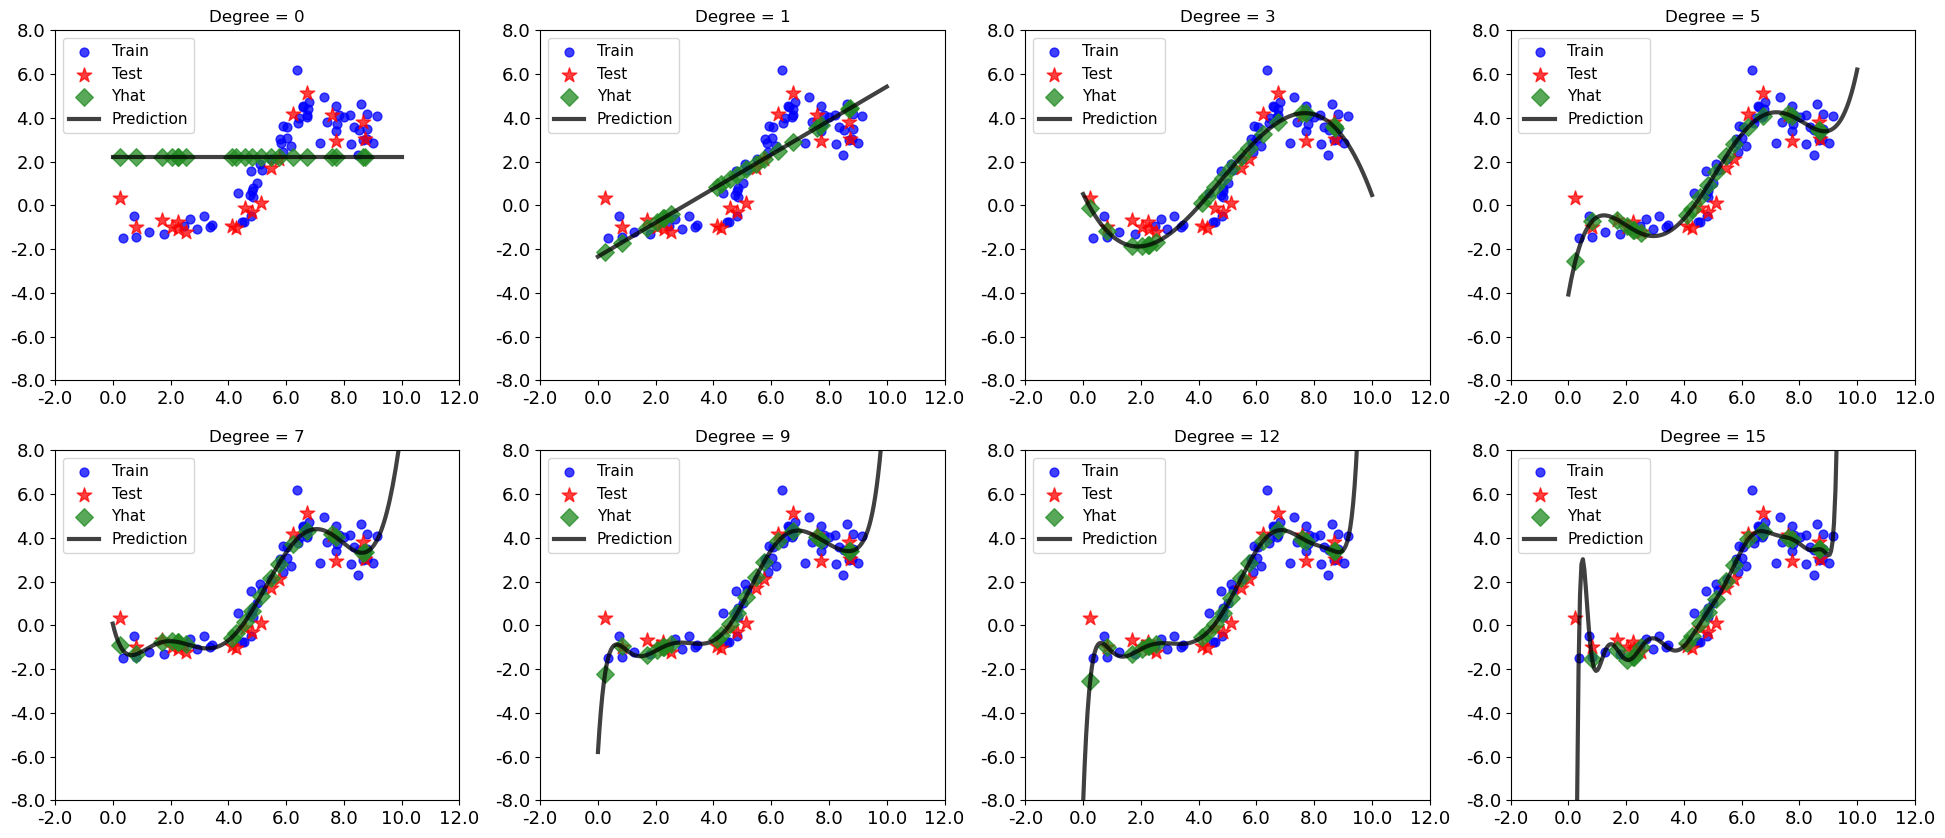

In [95]:
degrees = [0,1,3,5,7,9,12,15]
learners = [ [] ]*len(degrees)

fig, ax = plt.subplots(2,4, figsize=(24,10))

for i,degree in enumerate(degrees):

    ### YOUR CODE STARTS HERE ###
 
    # Create a polynomial feature expansion of degree d
    Phi = PolynomialFeatures(degree=degree).fit(Xt)
    XtP = Phi.transform(Xt)
    XeP = Phi.transform(Xe)
    x_spacedP = Phi.transform(x_spaced)

    # Use StandardScaler to rescale the transformed data
    scale = StandardScaler().fit(XtP)
    XtP_transform = scale.transform(XtP)
    XeP_transform = scale.transform(XeP)
    x_spacedP_transform = scale.transform(x_spacedP)
    
    # Fit your linear regression and save it to "learners"
    
    lr = LinearRegression().fit(XtP_transform, Yt)

    YeHat = lr.predict(XeP_transform)
    YtHat = lr.predict(XtP_transform)
    yhat_spaced = lr.predict(x_spacedP_transform)
    
    learners[i] = (degree, lr, YeHat, YtHat)
    
    axi = ax[i//4,i%4]
    axi.scatter(Xt, Yt, s=40, color='blue', alpha=0.75, label='Train')
    axi.scatter(Xe, Ye, s=120, marker='*', color='red', alpha=0.75, label='Test')
    axi.scatter(Xe, YeHat, s=80, marker='D', color='forestgreen', alpha=0.75, label='Yhat')
    axi.plot(x_spaced, yhat_spaced, lw=3, color='black', alpha=0.75, label='Prediction')  # plot the data and your prediction function
    axi.set_xlim(-0.2, 10.5)
    axi.set_ylim(-7, 7)         # you'll want to set a consistent y-scale for comparison
    axi.set_title(f"Degree = {degree}")        # don't forget to label your plots
    axi.legend(fontsize=11, loc=0)
    axi.set_xticks(axi.get_xticks())
    axi.set_yticks(axi.get_yticks())
    axi.set_xticklabels(axi.get_xticks(), fontsize=13)
    axi.set_yticklabels(axi.get_yticks(), fontsize=13)
    
    ###  YOUR CODE ENDS HERE  ###


## P3.2 Model Performance
Compute the mean squared error (MSE) loss of each of your trained models on both the training data and the evaluation data.  Plot these errors as a function of degree (so, degree along the horizontal axis, MSE loss as the vertical axis).

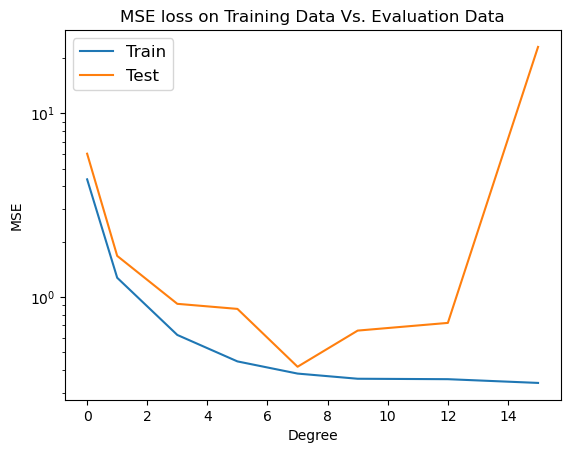

In [97]:
mse_train = [0]*len(degrees)
mse_test = [0]*len(degrees)

for i,degree in enumerate(degrees):
    # Recompute the degree-d poly transform if you didn't save it!
    YtHat = learners[i][3]
    YeHat = learners[i][2]
    mse_train[i] = mse(Yt, YtHat)
    mse_test[i] = mse(Ye, YeHat)

# plot mse_train and mse_test as a function of the degree
plt.semilogy(degrees, mse_train, label='Train')
plt.semilogy(degrees, mse_test, label='Test')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE loss on Training Data Vs. Evaluation Data')
plt.legend(fontsize=12)
plt.show()

## P3.3 Model Selection
Which degree would you select to use?

#### My answer
The error is high if the degree is smaller or larger. It's the same issue with the KNN model. We don't want to overfit or underfit. So we will look at the minimum MSE for the test data, and look at the corresponding degree for that. In this case, it appears to be degree=7 so I would use degree=7. 

# P4: Cross-validation
Cross validation is another method of model complexity assessment.  We use it only to determine the correct setting of complexity-altering parameters ("hyperparameters"), such as how many and which features to use, or parameters like "k" in KNN, for which training error alone provides little information.  In particular, cross validation will not produce a specific model (parameter values), only a setting of the hyperparameter values that cross-validation thinks will lead to a model (parameter values) with low test error.

## P4.1:  5-Fold Cross-validation

In the previous problem, we decided what degree of polynomial fit to use based on the performance on a held-out set of test data.  Now suppose that we do not have access to the target values of those data.  How can we determine the best degree?  

We could perform another split; but since this is reducing the number of data available, let us instead use cross-validation to evaluate the degrees.  Cross-validation works by splitting the training data $X_T$ multiple times, one for eack of the $K$ partitions (``n_splits`` in the code), and repeat our entire training and evaluation procedure on each split:

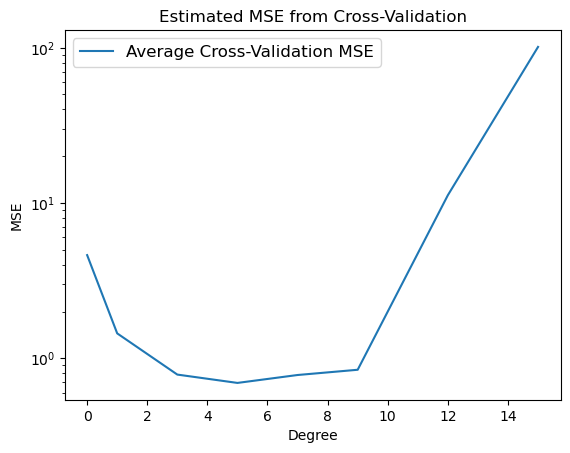

In [102]:
mse_xval = [ 0. ]*len(degrees)

for j,degree in enumerate(degrees):   # loop over desired degree values

    ### YOUR CODE STARTS HERE ###

    xval = KFold(n_splits = 5)      # split into k=5 splits
    mse_fold = []
    for train_index, val_index in xval.split(Xt):
        # Extract the ith cross-validation fold (training/validation split)
        Xti,Xvi,Yti,Yvi = Xt[train_index],Xt[val_index],Yt[train_index],Yt[val_index]

        # Now, build the model:
        # Create a polynomial feature expansion

        Xti_Phi = PolynomialFeatures(degree=degree).fit(Xti)
        XtP = Xti_Phi.transform(Xti)
        XvP = Xti_Phi.transform(Xvi)
    
        # Create a StandardScaler
        scale = StandardScaler().fit(XtP)
        XtP_transform = scale.transform(XtP)
        XvP_transform = scale.transform(XvP)

        # Fit the linear regression model on the training folds, Xti/Yti
        lr = LinearRegression().fit(XtP_transform, Yti)
    
        YvHat = lr.predict(XvP_transform)
        
        # Compute the MSE on the evaluation fold, Xvi/Yvi

        mse_fold.append(mse(Yvi, YvHat))
        
    # Evaluate the quality of this degree by averaging the MSE across the five folds
    mse_xval[j] = np.mean(mse_fold)
    

# Plot the estimated MSE from cross-validation as a function of the degree
plt.semilogy(degrees, mse_xval, label='Average Cross-Validation MSE')
# plt.semilogy(degrees, mse_test, label='Test')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Estimated MSE from Cross-Validation')
plt.legend(fontsize=12)
plt.show()
             
    ###  YOUR CODE ENDS HERE  ###

## P4.2: Cross-validation model selection

What degree would you choose based on the cross validation performance?

# My answer:
Degree 5 because it corresponds to the smallest average cross-validation MSE which means that there is not overfitting or underfitting.

## P4.3 Comparison to test performance

How do the MSE estimates from 5-fold cross-validation compare to the estimated test performance you found from your held-out data, $X_E$?  Explain briefly.

# My answer:
The MSE estimate from the 5-fold cross validation is smaller (best degree is 5 for cross-val while held-out best degree is 7) and generally the trend more smooth than the estimated test performance from the held-out data X_E. The significance of this is that although this is the case, the models overall are trained to properly work with the evaluation/validation/test data.

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

Minnie Kay/myself